#선형회귀 실습
##처음부터 작성하기


In [0]:
import numpy as np
import random as rd
import matplotlib.pylab as plt
from matplotlib import cm
import csv


train_set = []
test_set = []

with open("/content/drive/My Drive/Colab Notebooks/assignment-02/data_train.csv", newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        train_set.append([1,float(i[0]),float(i[1]),float(i[2]),float(i[3])])

with open("/content/drive/My Drive/Colab Notebooks/assignment-02/data_test.csv", newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    for i in reader:
        test_set.append([1,float(i[0]),float(i[1]),float(i[2]),float(i[3])])   

train_set = np.array(train_set)
test_set = np.array(test_set)




정체미상의 데이터들입니다. $$[[x_1^{(1)},x_2^{(1)},x_3^{(1)},y^{(1)}],...]$$

각각 300,4짜리입니다. 
수학적 깔끔함을 위해 $[1,1,1,1, \dots]^T$를 맨 왼쪽에 붙이도록 합니다, 300, 5로 바꾸겠습니다.


$$[[x_0^{(1)},x_1^{(1)},x_2^{(1)},x_3^{(1)},y^{(1)}],...]$$


In [0]:
for i in range(1,5):
    mu = np.average(train_set[:,i])
    s = np.std(train_set[:,i])
    train_set[:,i] = (train_set[:,i]-mu)/s
    test_set[:,i] = (test_set[:,i]-mu)/s

다변수를 선형회귀 하므로 각각의 분포가 엇비슷해지도록 (빠른 학습을 위해) 조금의 변환을 가합니다.
$$ x_j^{(i)} = \frac{x_j^{(i)}-\mu}{S} $$ (그리고 y도)

이때 $\mu$와 $S$는 단위의 변환이 될 것이므로, ~~균등한 변화를 위해 트레이닝 셋과 테스트 셋 전체에서 추출하여 각각에 적용합니다.~~  
트레이닝 셋만을 가지고 학습하는 것이므로 트레이닝 셋에서만 $\mu$와 $S$를 추출합니다.  
다만, 어떤 테스트 셋이 주어져도, 같은 변환은 필요하므로 변환은 적용합니다.


# Input points

1. plot a set of training set's points $ \{(x_0^{(i)},x_1^{(i)},x_2^{(i)},x_3^{(i)},y^{(i)})\}$  
2. plot a set of testing set's points $ \{(x_0^{(i)},x_1^{(i)},x_2^{(i)},x_3^{(i)},y^{(i)})\}$  


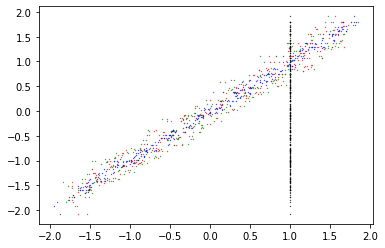

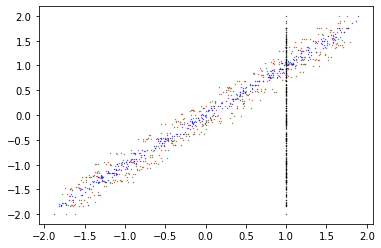

In [42]:
plt.scatter(train_set[:,0],train_set[:,4], c="black", s=0.1)
plt.scatter(train_set[:,1],train_set[:,4], c="red", s=0.1)
plt.scatter(train_set[:,2],train_set[:,4], c="green", s=0.1)
plt.scatter(train_set[:,3],train_set[:,4], c="blue", s=0.1)

plt.show()

plt.scatter(test_set[:,0],test_set[:,4], c="black", s=0.1)
plt.scatter(test_set[:,1],test_set[:,4], c="red", s=0.1)
plt.scatter(test_set[:,2],test_set[:,4], c="green", s=0.1)
plt.scatter(test_set[:,3],test_set[:,4], c="blue", s=0.1)
plt.show()

# Linear regression
모델은 다음과 같다.
$$ h_\theta​(x)=\theta_0​x_0+\theta_1​x_1+\theta_2​x_2+\theta_3​x_3 = \theta \cdot x$$
cost는 다음과 같다.
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}​(h_\theta​(x^{(i)})−y^{(i)})^{2} $$

위의 플롯을 보니 $\theta_{initial}$은 1이 제일 적합할 것 같습니다.

함수 h(th0, th1, x)를 정의하여 편의를 위해 사용한다.  
J 함수로 오차를 일단 생각해본다.  
역시 오차가 이상하므로 GD를 시작한다.

$$ \theta_j(t+1)​ := \theta_j(t)​−α​\frac{1}{m}\sum_{i=1}^{m}​(h_θ​(x^{(i)})−y^{(i)})x_j^{(i)} $$


이것을 바탕으로 다음 $\theta$를 정해봅니다.



In [0]:
g_th = np.array([0,5,5,5])
alpha = 0.000022
m = len(train_set)

def h(th, x):
    return np.matmul(th,x)

def J(th, data): 
    return (1/(2*m)) * np.sum((h(th, np.transpose(data[:,0:4]))- data[:,4]) ** 2)

def th_cal(th):
    result = []
    diff = (h(th, np.transpose(train_set[:,0:4])) - train_set[:,4])
    for j in range(len(th)):
        result.append( th[j]-(alpha * (1/m) * np.sum(  diff * train_set[:,j] )) )
    return np.array(result)


In [44]:
J_log_train = [J(g_th, train_set)]
J_log_test = [J(g_th, test_set)]
th_log = [g_th]


# import sys
e = 10 ** (-7)
from tqdm import tqdm, trange

for i in tqdm(range(550000)):
    g_th = th_cal(g_th)
    J_log_train.append(J(g_th, train_set))
    J_log_test.append(J(g_th, test_set))
    th_log.append(g_th)
    if abs(J(g_th, test_set) - J_log_test[-2]) <=e and abs(J(g_th, train_set) - J_log_train[-2]) <=e:
        break






  0%|          | 0/550000 [00:00<?, ?it/s]



  0%|          | 821/550000 [00:00<01:06, 8209.36it/s]



  0%|          | 1650/550000 [00:00<01:06, 8230.66it/s]



  0%|          | 2549/550000 [00:00<01:04, 8443.61it/s]



  1%|          | 3349/550000 [00:00<01:05, 8302.87it/s]



  1%|          | 4373/550000 [00:00<01:01, 8800.97it/s]



  1%|          | 5277/550000 [00:00<01:01, 8870.53it/s]



  1%|          | 6130/550000 [00:00<01:02, 8765.53it/s]



  1%|▏         | 7155/550000 [00:00<00:59, 9161.65it/s]



  1%|▏         | 8120/550000 [00:00<00:58, 9302.30it/s]



  2%|▏         | 9135/550000 [00:01<00:56, 9539.54it/s]



  2%|▏         | 10177/550000 [00:01<00:55, 9785.45it/s]



  2%|▏         | 11190/550000 [00:01<00:54, 9884.04it/s]



  2%|▏         | 12172/550000 [00:01<00:57, 9402.87it/s]



  2%|▏         | 13113/550000 [00:01<00:58, 9159.70it/s]



  3%|▎         | 14031/550000 [00:01<01:00, 8834.28it/s]



  3%|▎         | 14932/550000 [00:01<01:00, 8885.98it/s]



 

# 코드 구조의 설명
학습율은 0.01로 하면, 초기 검사에서 적합하다는 사실을 얻었습니다.
(발산하지 않는 정도에서 적당히 컸음)

the optimization should be performed until convergence 라는 조건문을 보고
모든 변화율이 특정 값 아래로 떨어지면 정지시키려고 하였습니다.

if abs(J(g_th0, g_th1)) < 1 and abs(g_th0 - th0_log[-2]) <= e and abs(g_th1 - th1_log[-2]) <= e and abs(J(g_th0, g_th1) - J_log[-2]) <=e:를 조건으로 사용하려고 하였습니다만, (기울기가 더 이상 변하지 않는 것)
(단 e는 시스템의 float의 입실론값)

언제 멈출 지 모르기도 하고, 진행사항을 확인하기가 너무 어려워, 
250,000 회 반복해서, 진행사항을 확인했습니다.
아직 bias가 학습되지 않았으므로 
적당히 돌아갈 수 있는 크기인
350,000 회로 설정하여 테스트합니다.

g_th0 :  2.4751128432339686 g_th1 :  0.9963501834570437 cost :  3.5559549191289355

코스트가 3~4 이였습니다.

적당하다고 생각해서 

abs(J(g_th0, g_th1) - J_log[-2]) 등의 값을 조사하여보니
7.304113649730937e-05 등의 값을 얻었습니다.

그래서 e 값을 $$ 5*10^{-6}$$
으로 두고 이때의 변화율에 도달한다면, 프로그램을 정지시키도록 하였습니다.

최종적으로 550,000 번을 돌고, 중간에 e 이하로 학습 변화율이 떨어진다면 정지시키도록 하였습니다.




In [45]:
print(J_log_train[-2])
print(J_log_test[-2])

0.010666739259050088
0.011096372699771533




---



# Plot the estimated parameters using the training dataset [3pt]


1. plot the estimated parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$ at every iteration of gradient descent until convergence
2. the colors for the parameters $\{ (\theta_0, \theta_1, \theta_2, \theta_3) \}$ should be black, red, green, blue, respectively
3. the optimization is performed using the training dataset ('data_train.csv')

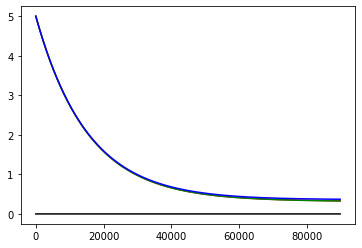

In [46]:
th_log = np.array(th_log)
#플롯을 위한 준비


plt.plot(th_log[:,0],c='black')
plt.plot(th_log[:,1],c='red')
plt.plot(th_log[:,2],c='green')
plt.plot(th_log[:,3],c='blue')
plt.show()

# Plot the training error using the training dataset [4pt]

1. plot the training error $J(\theta_0, \theta_1, \theta_2, \theta_3)$ at every iteration of gradient descent until convergence (in blue color)

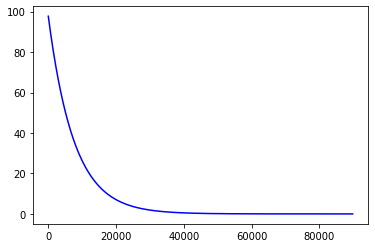

In [47]:
plt.plot(J_log_train,c='blue')
plt.show()

# Plot the testing error using the testing dataset at every iteration of gradient descent until convergence [5pt]

1. plot the testing error $J(\theta_0, \theta_1, \theta_2, \theta_3)$ at every iteration of gradient descent until convergence (in red color)

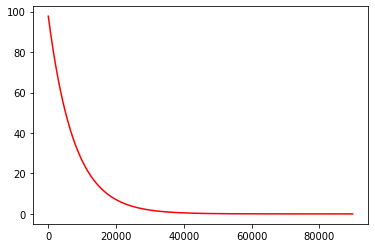

In [48]:
plt.plot(J_log_train,c='red')
plt.show()